In [2]:
#NOTE: pip install the requirements.txt as well as these other imports if not installed



#Imports
import math
import torch
import pandas as pd
import csv
import vec2text
import openai
from openai import OpenAI
from openai.resources import embeddings as OpenAI_embed_class
import torch
import logging
import torch
import umap
import numpy as np


c:\Users\14158\miniconda3\envs\sky\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# Specify the path to your CSV file
csv_file_path = 'OUTPUT_STRINGS.csv'

# Initialize an empty list to store the strings
input_strings = []

# Open the CSV file and read its contents
with open(csv_file_path, mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        input_strings.append(row[0])
input_strings.pop(0)


'Column Name'

In [6]:

# Specify the path to your CSV file
csv_file_path = 'TENSOR_EMBEDDINGS.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
# Convert the DataFrame to a numpy array
numpy_array = df.values
# Convert the numpy array to a PyTorch tensor
tensor_list_vectors = torch.tensor(numpy_array, dtype=torch.float)

print(tensor_list_vectors)


tensor([[-0.0050,  0.0005,  0.0197,  ..., -0.0250,  0.0037, -0.0389],
        [ 0.0058,  0.0085, -0.0250,  ..., -0.0060,  0.0009, -0.0302],
        [-0.0176, -0.0190,  0.0259,  ..., -0.0232,  0.0173, -0.0226],
        ...,
        [ 0.0022, -0.0098,  0.0269,  ...,  0.0012,  0.0240, -0.0295],
        [ 0.0052, -0.0183,  0.0232,  ..., -0.0171,  0.0082, -0.0282],
        [-0.0129,  0.0029,  0.0304,  ..., -0.0237,  0.0131, -0.0487]])


In [13]:
# #create umap object
# data = tensor_list_vectors.numpy()
# reducer = umap.UMAP()
# UMAP_embeddings = reducer.fit_transform(data)

# # #Get Output:

# df = pd.DataFrame(UMAP_embeddings)
# csv_file_path = 'UMAP_OUTPUT.csv'
# df.to_csv(csv_file_path, index=False)  # index=False to avoid writing row indices

anchor_points = [93, 73, 45, 28, 68, 92, 99, 57, 82, 2, 44, 91, 56]




[[ 8.979481    1.2679621 ]
 [ 8.161454    0.2950285 ]
 [ 9.811664    3.0650945 ]
 [ 8.856018    2.1447444 ]
 [ 9.127537    0.8594502 ]
 [ 8.331332    1.2772844 ]
 [ 9.545784    2.1687458 ]
 [ 6.9288993   3.1767702 ]
 [ 8.021575    0.33723676]
 [10.164034    3.2722037 ]
 [ 7.062847    2.733552  ]
 [10.420258    3.189471  ]
 [ 9.690434    1.0377787 ]
 [10.048781    1.1381842 ]
 [ 8.662901    4.172743  ]
 [ 8.331989    2.3447893 ]
 [ 8.504055    1.5049222 ]
 [10.994895    3.2040925 ]
 [ 8.464129    2.2594354 ]
 [ 8.821841    1.4280257 ]
 [ 9.8831415   1.7657908 ]
 [ 7.318351    0.31504712]
 [ 7.02572     3.3524036 ]
 [ 9.546259    1.9024049 ]
 [ 7.871831    3.8135207 ]
 [ 7.736324    3.893045  ]
 [ 7.4086933   3.4086087 ]
 [ 8.147048    3.3646932 ]
 [ 7.590051    2.5525427 ]
 [ 9.447355    2.6330705 ]
 [ 9.552619    0.88755625]
 [ 9.671119    0.40698016]
 [ 9.0608835   4.1810164 ]
 [ 8.114449    2.5320795 ]
 [10.109345    2.4909596 ]
 [ 6.84264     0.7842398 ]
 [ 7.87702     4.351214  ]
 

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})


embeddings2d:  100


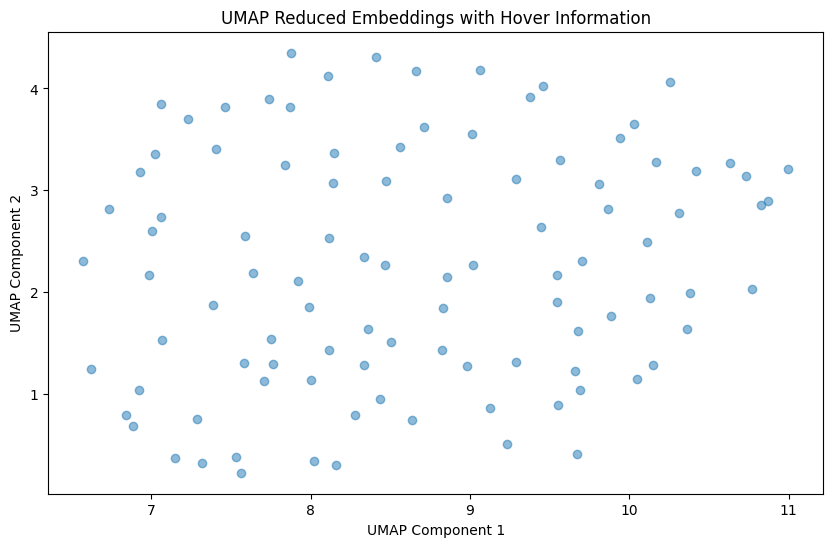

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# Assuming the umap step has been completed and UMAP_embeddings is available

# Create a scatter plot for all points
fig, ax = plt.subplots(figsize=(10, 6))

print("embeddings2d: ",len(UMAP_embeddings))
scatter = ax.scatter(UMAP_embeddings[:, 0], UMAP_embeddings[:, 1], alpha=0.5)

# Annotation for displaying the coordinates, initially hidden
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))

annot.set_visible(False)

def update_annot(ind):
    # Get the index of the hovered point
    index = ind["ind"][0]  # Assuming you want the first if there are multiple
    # Get the position of the hovered point
    pos = scatter.get_offsets()[index]
    
    annot.xy = pos
    # Format and display the annotation text (Index and umap coordinates)
    text = f"Index: {index}, Coordinates: {pos}"
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)

def hover(event):
    # Check if the event is over the scatter plot area
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = scatter.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

# Connect the hover event
fig.canvas.mpl_connect("motion_notify_event", hover)

plt.title('UMAP Reduced Embeddings with Hover Information')

plt.xlabel('UMAP Component 1')

plt.ylabel('UMAP Component 2')

plt.show()


NOTE: Previous Anchor points don't apply to the new UMAP transformation


In [9]:


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import copy

corrector = vec2text.load_corrector("text-embedding-ada-002")

c:\Users\14158\miniconda3\envs\sky\Lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [25]:


tensor_vectors = tensor_list_vectors #all the 1536 size embeddings
anchor_points = [94, 85, 40 ,34, 53, 19, 76, 38, 33, 90, 95] # anchor points of the heart
embeddings2d = UMAP_embeddings #all the 2 size embeddings
input_strings = input_strings #all the strings of embedding sentences
cur_umap = reducer



def distance_2d(source, target):
    print("target: ", target[0], target[1], "source: ",source[0],source[1])
    return math.sqrt((target[0] - source[0])**2 + (target[1] - source[1])**2)

def Input_Embedding(input_string :str, embedding, input_umap: umap, tensorlist) -> torch.tensor:
    
    input_strings.append(input_string)
    #concat the tensors first and then run umap transform on it: 
    concatenated_list = torch.cat((tensorlist, embedding), dim=0)
    list2d = input_umap.transform(concatenated_list) # -> 2d embedding list
    #grabs lastly added tensor vector from the ouput
    newly_2d = list2d[-1] # -> torch.tensor

    return list2d, newly_2d, concatenated_list # ->tensorflow list





def cosine_similarity(vector_a, vector_b):
    # Compute the dot product of vector_a and vector_b
    # print(vector_a)
    # print(vector_b)

    dot_product = torch.dot(vector_a, vector_b)
    # Compute the magnitude (norm) of vector_a and vector_b
    norm_a = torch.linalg.norm(vector_a)
    norm_b = torch.linalg.norm(vector_b)
    # Compute the cosine similarity
    cosine_sim = dot_product / (norm_a * norm_b)
    return cosine_sim

def brody_invert_embeddings(
    # target_embedding: torch.Tensor,
    # hypthoesis_embedding: torch.Tensor,
    tensor_vectors: torch.tensor,
    embeddings2d: np.array,
    anchor_list: list,
    sim: float,  
) -> list[str]:
    
    corrector.inversion_trainer.model.eval()
    corrector.model.eval()

    gen_kwargs = copy.copy(corrector.gen_kwargs)
    gen_kwargs["min_length"] = 1
    gen_kwargs["max_length"] = 128

    distance = np.inf
    similarity = 0
    pathIndex = []
    path2d = []
    path1536 = []
    new_inputs = {}
    euclidian_distance2d = []
    consine_similarity_list = []

    print("\n\nSTART OF FUNCTION\n\n\n")
    # for index in range(0, len(anchor_list)):
    for index in range(0, 1):
        print("source point: ", anchor_list[index], "\n\n")

        #Add initial anchor's attributes to arrays
        pathIndex.append(anchor_list[index])
        path2d.append(embeddings2d[anchor_list[index]])
        path1536.append(tensor_vectors[anchor_list[index] - 1: anchor_list[index], :])

        #setup: 
        source2d = embeddings2d[anchor_list[index]]
        hypothesis_embedding = tensor_vectors[anchor_list[index] - 1: anchor_list[index], :]
        encoded_inputs = corrector.tokenizer.encode_plus(input_strings[anchor_list[index]], add_special_tokens=True, return_tensors='pt')
        # encoded_inputs = corrector.tokenizer.encode_plus(input_strings[anchor_list[index]], add_special_tokens=True)
        input_ids = encoded_inputs["input_ids"]
        attention_mask = encoded_inputs["attention_mask"]
    
         #if at last index in list we set the target back to our starting point
        if index == len(anchor_list) - 1:
            target2d = embeddings2d[anchor_list[0]]
            target_embedding = tensor_vectors[anchor_list[0] - 1: anchor_list[0], :]
        else:
            target2d = embeddings2d[anchor_list[index + 1]]
            target_embedding = tensor_vectors[anchor_list[index + 1] - 1: anchor_list[index + 1], :]
            
        print("ORIGINAL hypothesis embed: ",hypothesis_embedding)
        
        new_inputs["frozen_embeddings"] = target_embedding
        new_inputs["hypothesis_input_ids"] = input_ids
        new_inputs["hypothesis_embedding"] = hypothesis_embedding
        new_inputs["hypothesis_attention_mask"] = attention_mask

        counter = 0
        # while similarity < sim:
        while counter != 50:
            print("counter: ", counter)
            output_list, new_inputs  = corrector.brody_generate(
                inputs=new_inputs,
                generation_kwargs=gen_kwargs,
                num_recursive_steps_so_far=counter
                )

            #NOTE: ouput_list: list of [gen_text_ids, hypothesis_embedding]
            
            # target_embedding = new_inputs["frozen_embeddings"]
            # output_ids = new_inputs["hypothesis_input_ids"]
            # attention_mask = new_inputs["hypothesis_attention_mask"]

            output_string = corrector.tokenizer.batch_decode(
                output_list[0], skip_special_tokens=True
            )

            print(output_string)
            new_inputs["hypothesis_embedding"] = output_list[1]
            hypothesis_embedding = output_list[1]
            new_inputs["hypothesis_input_ids"] = output_list[0]

            #adds embedding to global list of tensor_vectors as well as global list of 2d embeddings
            embeddings2d, new_2d, tensor_vectors = Input_Embedding(output_string, hypothesis_embedding, cur_umap, tensor_vectors)
            source2d = new_2d

            #calculate new euclidian distance: 
            distance = distance_2d(source2d ,target2d)
            print("\n\nDISTANCE: ",distance)
            similarity = cosine_similarity(hypothesis_embedding[0],target_embedding[0])
            print("SIMILARITY: ",similarity, "\n\n")

            euclidian_distance2d.append(distance)
            consine_similarity_list.append(similarity)

            #TODO: add embeddings of 1536, 2 and the newly added indexes to their respective lists
            pathIndex.append(input_strings[-1])
            path2d.append(new_2d)
            path1536.append(hypothesis_embedding)

            counter +=1

        #end of while loop:
        
        
    # return pathIndex, path2d, path1536
    return euclidian_distance2d, consine_similarity_list


distance2d_list, cosinesim_list = brody_invert_embeddings(tensor_vectors, embeddings2d, anchor_points, .98)

# indexpath, path_2d, path_1536 = brody_invert_embeddings(tensor_vectors, embeddings2d, anchor_points, .98)

print("PRAY FOR ME:\n\n ")

# print("indexpath: ", indexpath,"\n")
# print("path_2d: ", path_2d,"\n")
# print("path_1536: ", path_1536,"\n")





START OF FUNCTION



source point:  94 


ORIGINAL hypothesis embed:  tensor([[ 0.0010, -0.0140,  0.0237,  ..., -0.0177,  0.0255, -0.0409]])
counter:  0
RECURSIVE STEPS:  0
NEW hypothesis embedding:  tensor([[-0.0124, -0.0328,  0.0002,  ..., -0.0077,  0.0074, -0.0245]])
['Making a meal and then preparing a delicious grilled broccoli soup with a salad positively motivates me to be hungry, motivated and ready to go today.']
target:  10.147761 1.2848727 source:  7.413593 -0.2289951


DISTANCE:  3.125295677124287
SIMILARITY:  tensor(0.8878) 


counter:  1
RECURSIVE STEPS:  1
NEW hypothesis embedding:  tensor([[-0.0097, -0.0344, -0.0075,  ..., -0.0163,  0.0021, -0.0242]])
['Trying to make a meal and then following my guts with a delicious Spicy Garlic & Broccoli Soup positively motivates me to reach my goals and be ready for the day.']
target:  10.147761 1.2848727 source:  7.552291 -0.2876618


DISTANCE:  3.0346880096903086
SIMILARITY:  tensor(0.8964) 


counter:  2
RECURSIVE STEPS:  2
NE

[tensor(0.8878), tensor(0.8964), tensor(0.8781), tensor(0.8907), tensor(0.9041), tensor(0.8950), tensor(0.9043), tensor(0.8727), tensor(0.8874), tensor(0.8925), tensor(0.8810), tensor(0.8822), tensor(0.8940), tensor(0.8977), tensor(0.8864), tensor(0.8823), tensor(0.8826), tensor(0.8989), tensor(0.8842), tensor(0.8954), tensor(0.8974), tensor(0.8898), tensor(0.8902), tensor(0.8755), tensor(0.8776), tensor(0.8845), tensor(0.8827), tensor(0.8872), tensor(0.8784), tensor(0.8787), tensor(0.8715), tensor(0.8729), tensor(0.8750), tensor(0.8889), tensor(0.8833), tensor(0.8909), tensor(0.8598), tensor(0.9022), tensor(0.8911), tensor(0.8915), tensor(0.8737), tensor(0.8792), tensor(0.8839), tensor(0.8888), tensor(0.8961), tensor(0.8905), tensor(0.8776), tensor(0.8956), tensor(0.8711), tensor(0.8936)]
[3.125295677124287, 3.0346880096903086, 3.181502592127545, 3.4188271683836824, 3.234522548557884, 2.8926153627319184, 3.083252644151745, 3.1251546488540822, 3.15433001016821, 3.008265124896506, 3.027

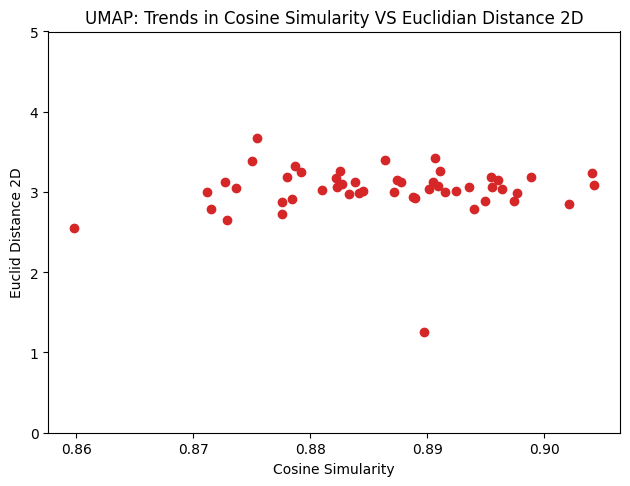

In [28]:
print(cosinesim_list)
print(distance2d_list)
print(len(cosinesim_list))
print(len(distance2d_list))
print(type(cosinesim_list[0]))
print(type(cosinesim_list))


import matplotlib.pyplot as plt
import torch
import numpy as np

def create_scatter_plot(consine_list, distance2d):
    # Sample data adjusted for tensors holding a single float number each
    

    # Preparing the data for plotting
      # Index positions
    x = [t.item() for t in consine_list]  # Extract single float value from each tensor
    y1 = distance2d  # Directly the float values

    # Setting up the plot with two y-axes
    fig, ax1 = plt.subplots()

    color1 = 'tab:red'
    ax1.set_xlabel('Cosine Simularity')
    ax1.set_ylabel('Euclid Distance 2D')
    scatter1 = ax1.scatter(x, y1, color=color1, label='Cosine Simularity')
    ax1.tick_params(axis='y')
    ax1.set_ylim(0, 5)  # Set the range of primary y-axis

    # Creating a twin Axes sharing the xaxis
    # ax2 = ax1.twinx()  
    # color2 = 'tab:blue'
    # ax2.set_ylabel('Euclidian 2d distance', color=color2)  
    # scatter2 = ax2.scatter(x, y2, color=color2, label='Euclidian 2d distance')
    # ax2.tick_params(axis='y', labelcolor=color2)
    # ax2.set_ylim(0, 1.0)  # Set the range of secondary y-axis

    # Creating a single legend for both datasets
    # legends = [scatter1]
    # labels = []
    # # ax1.legend(legends, labels, loc='upper right')
    # ax1.legend(legends, labels, loc='upper left', bbox_to_anchor=(1, 1.3))

    fig.tight_layout()  # Adjust subplot parameters for a nice fit
    plt.title('UMAP: Trends in Cosine Simularity VS Euclidian Distance 2D')
    plt.show()

# Call the function to create the plot
create_scatter_plot(cosinesim_list, distance2d_list)


In [ ]:
# import pandas as pd


# # Create a DataFrame with both arrays as separate columns
# df = pd.DataFrame({'Cosine Simularity': cosinesim_list, 'Euclid Distance 2D': distance2d_list})

# # Specify the file path for the CSV file you want to create
# csv_file_path = 'Cosine_Sim_Elucid_2D.csv'

# # Save the DataFrame to a CSV file, without writing row indices
# df.to_csv(csv_file_path, index=False)

In [29]:
output_strings= vec2text.invert_embeddings(
    embeddings=tensor_vectors[1 - 1: 1, :], #from above
    corrector=corrector,
    num_steps=20,
)
print(output_strings)

['I attended a local brewshop and the day was bright and cheerful. A gentle trick in the way of laughter relieved stress.']


In [82]:
# print(sentences_emb)
# print(output_strings,"\n\n\n\n")
print("Original sentence: I attended a workshop at a local brewery and had a positive relief from the stress and happiness of a day.\n\n\n")



cosine_similarity_list = []
test_embeddings = output_strings[1]
for item in range(0,20):
    print("COSINE SIMULARITY: ",cosine_similarity(sentences_emb[item][0], tensor_vectors[1 - 1: 1, :][0]), "            SENTENCE: ",output_strings[item] )
    cosine_similarity_list.append(cosine_similarity(sentences_emb[item][0], tensor_vectors[1 - 1: 1, :][0]))




Original sentence: I attended a workshop at a local brewery and had a positive relief from the stress and happiness of a day.



COSINE SIMULARITY:  tensor(0.8920)             SENTENCE:  ['I attended a brew workshop in the heat of the day and the gentle gentle technique had a positive effect on my mind and relieved stress.']
COSINE SIMULARITY:  tensor(0.8969)             SENTENCE:  ['I attended a workshop in a local brewery and the freshness of the art had a positive effect on my mind and I laughed at the stress of a day.']
COSINE SIMULARITY:  tensor(0.9057)             SENTENCE:  ['I attended a workshop at a local brewery and had a positive relief from the stress and happiness of a day.']
COSINE SIMULARITY:  tensor(0.9006)             SENTENCE:  ['I attended a brew workshop and the fresh air in the morning had a wonderful way of delivering relief from stress.']
COSINE SIMULARITY:  tensor(0.9149)             SENTENCE:  ['I attended a workshop and had a fresh laugh in the morning from t

<class 'range'>


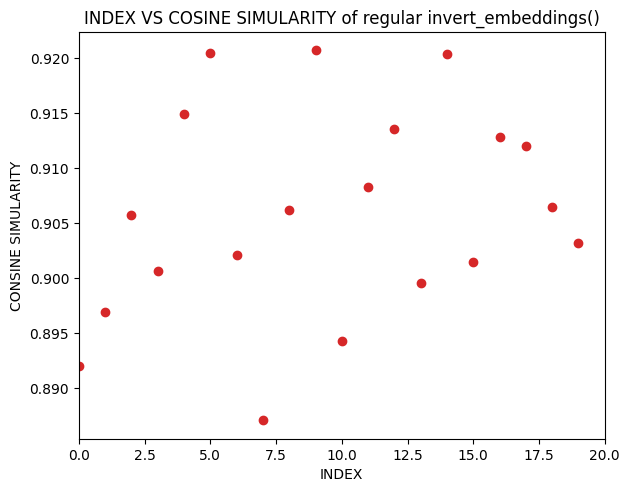

In [86]:
def create_scatter_plot(consine_list):
    # Sample data adjusted for tensors holding a single float number each
    

    # Preparing the data for plotting
      # Index positions
    y1 = [t.item() for t in consine_list]  # Extract single float value from each tensor
    x = range(0,20)  # Directly the float values
    print(range)

    # Setting up the plot with two y-axes
    fig, ax1 = plt.subplots()

    color1 = 'tab:red'
    ax1.set_xlabel('INDEX')
    ax1.set_ylabel('UMAP CONSINE SIMULARITY')
    scatter1 = ax1.scatter(x, y1, color=color1, label='Cosine Simularity')
    ax1.tick_params(axis='y')
    # ax1.set_ylim(0, 1.0)  # Set the range of primary y-axis
    ax1.set_xlim(0,20)
    # Creating a twin Axes sharing the xaxis
    # ax2 = ax1.twinx()  
    # color2 = 'tab:blue'
    # ax2.set_ylabel('Euclidian 2d distance', color=color2)  
    # scatter2 = ax2.scatter(x, y2, color=color2, label='Euclidian 2d distance')
    # ax2.tick_params(axis='y', labelcolor=color2)
    # ax2.set_ylim(0, 1.0)  # Set the range of secondary y-axis

    # Creating a single legend for both datasets
    # legends = [scatter1]
    # labels = []
    # # ax1.legend(legends, labels, loc='upper right')
    # ax1.legend(legends, labels, loc='upper left', bbox_to_anchor=(1, 1.3))

    fig.tight_layout()  # Adjust subplot parameters for a nice fit
    plt.title('INDEX VS COSINE SIMULARITY of regular invert_embeddings()')
    plt.show()

create_scatter_plot(cosine_similarity_list)